## Домашнее задание к лекции «Корреляция и корреляционный анализ»

Возьмите датасет Mortality and Water Hardness**
www.kaggle.com...r-hardness

В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

### Задание 1.
**Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?**

- Построить точечный график
- Рассчитать коэффициенты корреляции Пирсона и Спирмена
- Построить модель линейной регрессии
- Рассчитать коэффициент детерминации
- Вывести график остатков

### Задание 2.
**Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?**

- Разделить данные на 2 группы
- Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('water.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
df.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

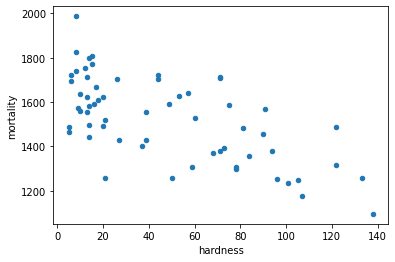

In [4]:
df.plot(kind='scatter', x='hardness', y='mortality')

<AxesSubplot:xlabel='mortality', ylabel='hardness'>

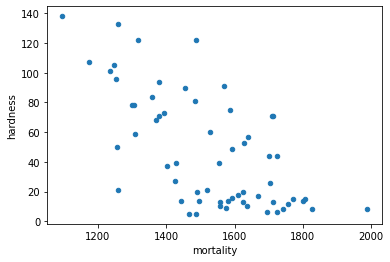

In [5]:
df.plot(kind='scatter', x='mortality', y='hardness')

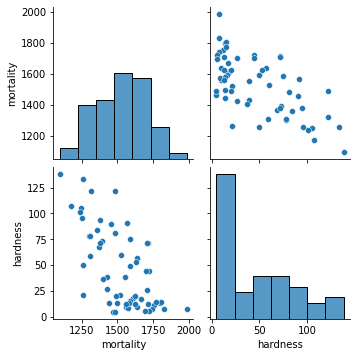

In [6]:
sns.pairplot(df)

In [7]:
df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [8]:
df[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [9]:
df[['mortality', 'hardness']].corr(method='kendall')

,mortality,hardness
mortality,1.000000,-0.464481
hardness,-0.464481,1.000000


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [11]:
X = df[['hardness']]
y = df['mortality']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [13]:
X_train.shape

(42, 1)

In [14]:
y_train.shape

(42,)

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [16]:
model.coef_

array([-3.13167087])

In [17]:
model.intercept_

1668.9722977277095

In [18]:
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [19]:
# Коэффициент детерминации

model.score(X_test, y_test) 

0.5046490611017092

Text(0, 0.5, 'mortality')

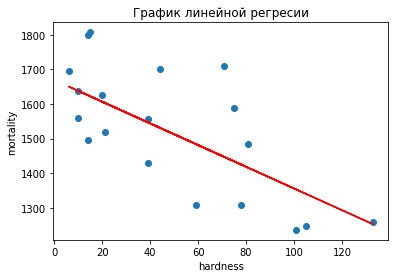

In [20]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')
plt.title('График линейной регресии')
plt.xlabel('hardness')
plt.ylabel('mortality')

Text(0, 0.5, 'mortality')

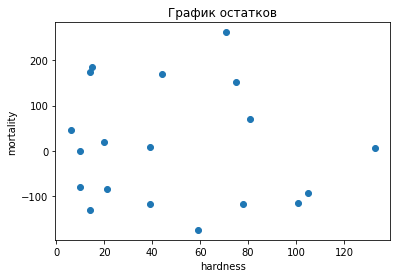

In [21]:
# График остатков (разница смежду фактом и прогнозом): 
#      - график получился хаотичный, что вполне неплохо

residuals = y_test - y_pred
plt.scatter(X_test, residuals)
plt.title('График остатков')
plt.xlabel('hardness')
plt.ylabel('mortality')

In [22]:
# Отвечая на вопрос, вероятно, что связь между жесткостью воды и среднеготовой смертностью есть. 
# При уменьшении жёсткости воды среднегодовая смертность растёт, но так как данных мало сказать со 100% уверенностью нельзя.

#### Задание 2.

In [23]:
# Разделим данные на две группы: северный и южный регион. И проведенм рачеты относительно регионов

df_s = df.loc[df['location'] == 'South']
df_s.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
2,South,Birmingham,1466,5
7,South,Bournemouth,1299,78
9,South,Brighton,1359,84
10,South,Bristol,1392,73


In [24]:
df_n = df.loc[df['location'] == 'North']
df_n.head()

,location,town,mortality,hardness
1,North,Birkenhead,1668,17
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
5,North,Bolton,1558,10
6,North,Bootle,1807,15


In [25]:
df_s[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [26]:
df_s[['mortality', 'hardness']].corr(method='kendall')

,mortality,hardness
mortality,1.000000,-0.452308
hardness,-0.452308,1.000000


In [27]:
df_n[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [28]:
df_n[['mortality', 'hardness']].corr(method='kendall')

,mortality,hardness
mortality,1.000000,-0.307563
hardness,-0.307563,1.000000


In [29]:
X_s = df_s[['hardness']]
y_s = df_s['mortality']
X_n = df_n[['hardness']]
y_n = df_n['mortality']

In [30]:
X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(X_s, y_s, test_size=0.30, random_state=42)
X_n_train, X_n_test, y_n_train, y_n_test = train_test_split(X_n, y_n, test_size=0.30, random_state=42)

In [31]:
print(X_s_train.shape)
print(X_n_train.shape)

(18, 1)
(24, 1)


In [32]:
model_s = LinearRegression()
model_s.fit(X_s_train, y_s_train)  
model_n = LinearRegression()
model_n.fit(X_n_train, y_n_train)

LinearRegression()

In [33]:
print(model_s.coef_)
print(model_n.coef_)

[-3.51342921]
[-1.97686226]


In [34]:
print(model_s.intercept_)
print(model_n.intercept_)

1640.2204603423374
1688.150229031281


In [35]:
y_s_pred = model_s.predict(X_s_test)
y_n_pred = model_n.predict(X_n_test)

In [36]:
# Коэффициент детерминации

print(model_s.score(X_s_test, y_s_test)) 
print(model_n.score(X_n_test, y_n_test))

-2.5519223012352077
0.018885304285745863


Text(0, 0.5, 'mortality')

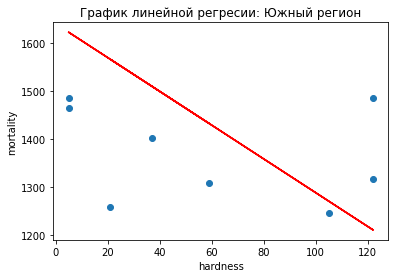

In [37]:
plt.scatter(X_s_test, y_s_test)
plt.plot(X_s_test, y_s_pred, c='r')
plt.title('График линейной регресии: Южный регион')
plt.xlabel('hardness')
plt.ylabel('mortality')

Text(0, 0.5, 'mortality')

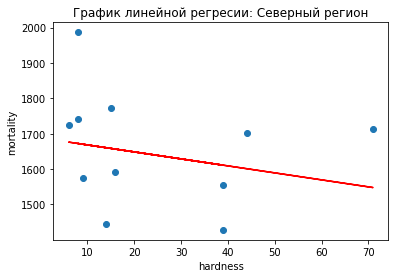

In [38]:
plt.scatter(X_n_test, y_n_test)
plt.plot(X_n_test, y_n_pred, c='r')
plt.title('График линейной регресии: Северный регион')
plt.xlabel('hardness')
plt.ylabel('mortality')

Text(0, 0.5, 'mortality')

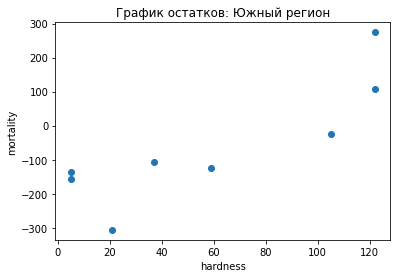

In [39]:
# График остатков (разница смежду фактом и прогнозом): 

residuals_s = y_s_test - y_s_pred
plt.scatter(X_s_test, residuals_s)
plt.title('График остатков: Южный регион')
plt.xlabel('hardness')
plt.ylabel('mortality')

Text(0, 0.5, 'mortality')

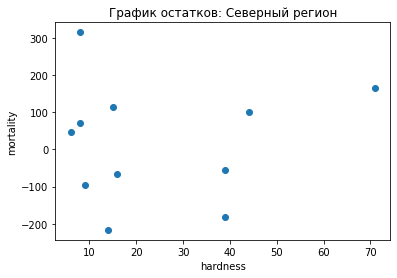

In [40]:
residuals_n = y_n_test - y_n_pred
plt.scatter(X_n_test, residuals_n)
plt.title('График остатков: Северный регион')
plt.xlabel('hardness')
plt.ylabel('mortality')

In [41]:
# Вывод:
# При разделении на группы получили модели худжего качества, чем в объединенной выборке.
# Коээфициент детерминации для северного региона лучше чем для южного. 
# По граффикам остатков такая же ситуация
# Для южного как раз получили отрицательный коэффициент детерминации который говорит о качестве нашей модели. 
# Но я счтитаю, что прежде всего это проблемы датасета. Тестовых данных для Южного региона - 18, а для Северного - 24.
# И конечно лдя построения модели это очень мало.

# Для улучшения модели необходимо расширить данными датасет и провести анализ заново